### Import the data set

In [1]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [2]:
train_df.head(50)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


##### # How many samples of each class?

In [3]:
train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [4]:
train_df_shuffled = train_df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


### Let's visualize some random training examples

In [5]:
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text:
I was body Bagging on the ????Today...4got to post my score http://t.co/81g18wSAUk

---

Target: 0 (not real disaster)
Text:
? The Circular Ruins - Displaced part 4 ? http://t.co/Od2ratxRqS #nowplaying

---

Target: 0 (not real disaster)
Text:
@CodeMeW Were you opening regular or master packs? RT: soÛ_ sunkÛ_1 mil credits into light sideÛ_ didn't pullÛ_oneÛ_you sure about those odds?

---

Target: 1 (real disaster)
Text:
Ton of smoke coming out of one of the new apartment buildings at 160 Ross in Auburn. Several fire trucks on scene. http://t.co/AHVYmSQHqC

---

Target: 1 (real disaster)
Text:
Investigators have said a Virgin Galactic spaceship crash was caused by structural failure after the co-pilot ... http://t.co/PnhPLJHo8E

---



In [6]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42) # random state for reproducibility

In [7]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization # after TensorFlow 2.6

# Before TensorFlow 2.6
# from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Note: in TensorFlow 2.6+, you no longer need "layers.experimental.preprocessing"
# you can use: "tf.keras.layers.TextVectorization"

# Use the default TextVectorization variables
text_vect = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?


In [9]:
# Fit the text vectorizer to the training text
text_vect.adapt(train_sentences)

In [10]:
# Create sample sentence and tokenize it
sample_sentence = "There is flood in my city"
text_vect([sample_sentence])

<tf.Tensor: shape=(1, 6), dtype=int64, numpy=array([[ 74,   9, 232,   4,  13, 182]])>

In [11]:
# Create sample sentence and tokenize it
sample_sentence = "There is flood in my city and we are looking for help"
text_vect([sample_sentence])

<tf.Tensor: shape=(1, 12), dtype=int64, numpy=array([[ 74,   9, 232,   4,  13, 182,   7,  46,  22, 884,  10, 148]])>

In [12]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [13]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary (most common words)
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [14]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [15]:
# Create sample sentence and tokenize it
sample_sentence = "There is flood in my city"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 74,   9, 232,   4,  13, 182,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [16]:
# Create sample sentence and tokenize it
sample_sentence = "There is flood in my city and we are looking for help"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 74,   9, 232,   4,  13, 182,   7,  46,  22, 884,  10, 148,   0,
          0,   0]])>

### DRAWBACKS of Textvectorization:
###           1. creats very huge matrix
###           2. results in sparse matrix representation
###           3. provides static vector representation

## Word Embedding

In [17]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1")



In [18]:
sample_sentence = "There is flood in my city"
sample_embed = embedding(text_vectorizer([sample_sentence]))
sample_embed

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.01771377, -0.03209858, -0.0256304 , ...,  0.01265093,
          0.02150384,  0.04730251],
        [-0.00693426, -0.02537806, -0.00057397, ...,  0.03044176,
          0.01590765, -0.00928924],
        [-0.04518341, -0.00700019,  0.01405826, ..., -0.00326661,
          0.00439493, -0.00079014],
        ...,
        [ 0.02916554,  0.03201303, -0.0146693 , ..., -0.039562  ,
          0.04205537,  0.04781863],
        [ 0.02916554,  0.03201303, -0.0146693 , ..., -0.039562  ,
          0.04205537,  0.04781863],
        [ 0.02916554,  0.03201303, -0.0146693 , ..., -0.039562  ,
          0.04205537,  0.04781863]]], dtype=float32)>

In [19]:
# Check out a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.01771377, -0.03209858, -0.0256304 , -0.02463893,  0.03253661,
        0.02843751,  0.03366293, -0.04468448, -0.04389429,  0.03742461,
       -0.03988993,  0.0464082 ,  0.0039752 , -0.03961299,  0.01826942,
       -0.01364513,  0.03803182, -0.01698954, -0.03920467, -0.0317646 ,
       -0.01020267, -0.00087655,  0.00378694, -0.02783598, -0.00192273,
        0.04970771, -0.01366874,  0.01035301, -0.01341562, -0.02612813,
        0.04726156,  0.00299032, -0.0043962 , -0.02143414, -0.01772139,
       -0.03062778, -0.01179332,  0.03090641, -0.04614913, -0.02058569,
       -0.04935372,  0.03409806,  0.04709179,  0.00303235,  0.00933047,
        0.01682844,  0.01887924,  0.0435554 ,  0.02855525, -0.03935912,
        0.0463425 ,  0.02852167,  0.02812276,  0.04143253, -0.01530414,
       -0.04186808,  0.02663377,  0.01087726, -0.03141136, -0.02079607,
        0.02089972,  0.02595012,  0.04685139,  0.02056513,  0.00822244,
        0.030291

### LSTM

In [20]:
# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64)(x) # return vector for whole sequence
x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [21]:
# Compile model
model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [22]:
# Fit model
model_history = model.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 12s 35ms/step - loss: 0.5200 - accuracy: 0.7361 - val_loss: 0.4580 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3238 - accuracy: 0.8710 - val_loss: 0.5024 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2222 - accuracy: 0.9132 - val_loss: 0.5702 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1521 - accuracy: 0.9447 - val_loss: 0.6629 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1060 - accuracy: 0.9585 - val_loss: 0.8128 - val_accuracy: 0.7664


In [23]:
# Make predictions on the validation dataset
model_pred_probs = model.predict(val_sentences)
model_pred_probs.shape, model_pred_probs[:10] # view the first 10

24/24 [==============================] - 0s 3ms/step


((762, 1),
 array([[1.9605070e-02],
        [7.3874938e-01],
        [9.9965835e-01],
        [3.7779544e-02],
        [4.8687708e-04],
        [9.9915171e-01],
        [9.7438771e-01],
        [9.9976987e-01],
        [9.9946338e-01],
        [3.5065979e-01]], dtype=float32))

In [24]:
### We can turn these prediction probabilities into prediction classes by rounding to the nearest integer
### (by default, prediction probabilities under 0.5 will go to 0 and those over 0.5 will go to 1).

# Round out predictions and reduce to 1-dimensional array
model_1_preds = tf.squeeze(tf.round(model_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [25]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
    return model_results

In [26]:
model_1_results = calculate_results(val_labels, model_1_preds)
model_1_results

{'accuracy': 76.64041994750657,
 'precision': 0.7679094748917975,
 'recall': 0.7664041994750657,
 'f1': 0.7642857598265804}

### Model 2: GRU

* Another popular and effective RNN component is the GRU or gated recurrent unit.

* The GRU cell has similar features to an LSTM cell but has less parameters.

In [27]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x) # return vector for whole sequence
x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [28]:
# Compile GRU model
model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [29]:
model_history = model.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 11s 38ms/step - loss: 0.2057 - accuracy: 0.9130 - val_loss: 0.6589 - val_accuracy: 0.7585
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0937 - accuracy: 0.9654 - val_loss: 0.9659 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0640 - accuracy: 0.9737 - val_loss: 1.2647 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0721 - accuracy: 0.9730 - val_loss: 1.1734 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0525 - accuracy: 0.9765 - val_loss: 1.3470 - val_accuracy: 0.7585


In [30]:
# Make predictions on the validation dataset
model_pred_probs = model.predict(val_sentences)
model_pred_probs.shape, model_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


((762, 1),
 array([[5.2195944e-02],
        [7.1616405e-01],
        [9.9996042e-01],
        [1.3791007e-01],
        [2.4627485e-05],
        [9.9995744e-01],
        [9.9916768e-01],
        [9.9999034e-01],
        [9.9997365e-01],
        [6.8311840e-01]], dtype=float32))

In [31]:
model_2_preds = tf.squeeze(tf.round(model_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [32]:
model_2_results = calculate_results(val_labels, model_2_preds)
model_2_results

{'accuracy': 75.8530183727034,
 'precision': 0.7582318952901055,
 'recall': 0.7585301837270341,
 'f1': 0.757619206049948}

### Model 3: Bidirectonal RNN model

* A standard RNN will process a sequence from left to right, where as a bidirectional RNN will process the sequence from left to right and then again from right to left.
 * In practice, many sequence models often see and improvement in performance when using bidirectional RNN's.

* However, this improvement in performance often comes at the cost of longer training times and increased model parameters (since the model goes left to right and right to left, the number of trainable parameters doubles).

In [33]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [34]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [35]:
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 15s 53ms/step - loss: 0.5073 - accuracy: 0.7456 - val_loss: 0.4592 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 2s 12ms/step - loss: 0.3130 - accuracy: 0.8732 - val_loss: 0.5142 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2126 - accuracy: 0.9177 - val_loss: 0.5618 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1463 - accuracy: 0.9512 - val_loss: 0.6544 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1025 - accuracy: 0.9635 - val_loss: 0.6718 - val_accuracy: 0.7717


In [36]:
# Make predictions with bidirectional RNN on the validation data
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


array([[0.0251411 ],
       [0.78883463],
       [0.9986332 ],
       [0.15772364],
       [0.00259424],
       [0.99604106],
       [0.95222944],
       [0.99948525],
       [0.9993382 ],
       [0.25357512]], dtype=float32)

In [37]:
# Convert prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [38]:
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 77.16535433070865,
 'precision': 0.7716675722378594,
 'recall': 0.7716535433070866,
 'f1': 0.7706024774352981}

### Conv1D

In [39]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")


In [40]:
# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")


In [41]:
# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [42]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 11s 38ms/step - loss: 0.5484 - accuracy: 0.7181 - val_loss: 0.4594 - val_accuracy: 0.7953
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3067 - accuracy: 0.8805 - val_loss: 0.5042 - val_accuracy: 0.7927
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1628 - accuracy: 0.9463 - val_loss: 0.5430 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1008 - accuracy: 0.9715 - val_loss: 0.5993 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0754 - accuracy: 0.9764 - val_loss: 0.6072 - val_accuracy: 0.7913


In [43]:
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d (Glob  (None, 32)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_5 (Dense)             (None, 64)             

In [44]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.5808999 ],
       [0.9375099 ],
       [0.99963355],
       [0.09485134],
       [0.01341117],
       [0.9972139 ],
       [0.9482142 ],
       [0.99262553],
       [0.9965938 ],
       [0.06140658]], dtype=float32)

In [45]:
# Convert model_5 prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [46]:
model_5_results = calculate_results(val_labels, model_5_preds)
model_5_results

{'accuracy': 79.13385826771653,
 'precision': 0.7957855407433384,
 'recall': 0.7913385826771654,
 'f1': 0.7886149964743017}

### Using Pretrained Embeddings (transfer learning for NLP)

* common practice is to leverage pretrained embeddings through transfer learning. This is one of the main benefits of using deep models: being able to take what one (often larger) model has learned (often on a large amount of data) and adjust it for our own use case.
* Universal Sentence Encoder:
    * Universal Sentence Encoder input is of variable length
    * Universal Sentence Encoder outputs a 512 dimensional vector for each sentence.

In [47]:
#!pip install tensorflow_hub

In [48]:
import tensorflow_hub as hub

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs is variable
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [49]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
                              sentence_encoder_layer, # take in sentences and then encode them into an embedding
                              layers.Dense(64, activation="relu"),
                              layers.Dense(32, activation="relu"),
                              layers.Dense(1, activation="sigmoid")], name="model_6_USE")

In [50]:
# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [51]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 10s 15ms/step - loss: 0.4882 - accuracy: 0.7748 - val_loss: 0.4345 - val_accuracy: 0.8018
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4023 - accuracy: 0.8221 - val_loss: 0.4215 - val_accuracy: 0.8202
Epoch 3/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3815 - accuracy: 0.8356 - val_loss: 0.4227 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3621 - accuracy: 0.8454 - val_loss: 0.4161 - val_accuracy: 0.8202
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3384 - accuracy: 0.8610 - val_loss: 0.4201 - val_accuracy: 0.8268


In [52]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 11ms/step


array([[0.13141797],
       [0.7967394 ],
       [0.99719846],
       [0.21536535],
       [0.7396279 ],
       [0.8674034 ],
       [0.9935648 ],
       [0.99334455],
       [0.97661567],
       [0.09403636]], dtype=float32)

In [53]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [54]:
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 82.67716535433071,
 'precision': 0.8285888810715674,
 'recall': 0.8267716535433071,
 'f1': 0.8255702411430795}

## Comparing the performance of each of our models

In [55]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"LSTM_Model": model_1_results,
                                  "GRU_Model": model_2_results,
                                  "Bidirectional RNN_Model": model_4_results,
                                  "conv1d": model_5_results,
                                  "USE_Encoder_Model": model_6_results})

all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
LSTM_Model,76.640420,0.767909,0.766404,0.764286
GRU_Model,75.853018,0.758232,0.758530,0.757619
Bidirectional RNN_Model,77.165354,0.771668,0.771654,0.770602
conv1d,79.133858,0.795786,0.791339,0.788615
USE_Encoder_Model,82.677165,0.828589,0.826772,0.825570


In [56]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

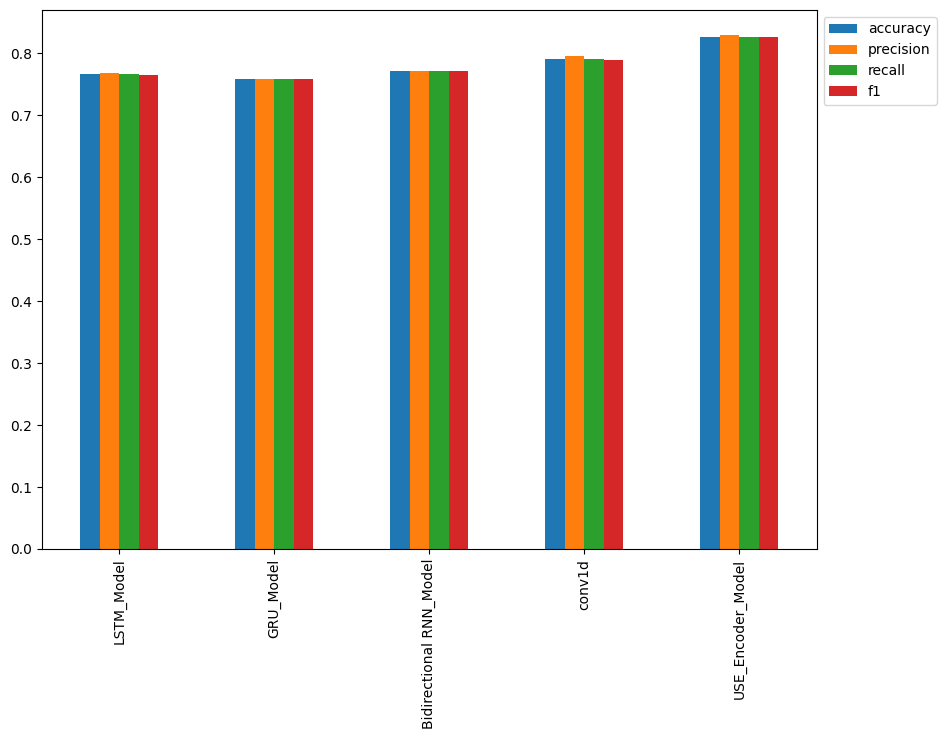

In [57]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));